In [1]:
################################
## Getting started & Data Set ##
################################

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#one_hot=TRUE: Conduct one-hot-encoding, i.e. the digit "1" [integer encoding] 
#              will be represented as (0,1,0,0,0,0,0,0,0,0).
#              28x28 pixels are flattened into a 784 vector
#              Grayscale of each pixel between 0 and 255 (black 255)

print(mnist.train.num_examples) # #55 000 train data
print(mnist.validation.num_examples) # #5000 validation data
print(mnist.test.num_examples) # #10 000 test data

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
55000
5000
10000


In [2]:
##################################
## How does the data look like? ##
##################################

import numpy as np
import matplotlib.pyplot as plt

i=1

dig = np.argmax(mnist.train.labels[i,:])
#argmax due to one-hot encoding.
#compare to using:
#dig = mnist.train.labels[i,:]

img = np.reshape(mnist.train.images[i,:], [28,28])
plt.imshow(img, cmap='Greys')
plt.show()
print(dig)

<Figure size 640x480 with 1 Axes>

3


In [3]:
####################
## Architecture I ##
####################

## Five Layer NN
n_input = 784  # input layer (28x28 pixels)
n_1 = 512  # 1st hidden layer
n_2 = 256  # 2nd hidden layer
n_3 = 128  # 3rd hidden layer
n_4 = 64   # 4th hidden layer
n_output = 10  # output layer (0-9 digits)

#Define 2 tensors as placeholders (tensors that we'll feed with values later)

x     = tf.placeholder("float", [None, n_input])   #None x 784
ystar = tf.placeholder("float", [None, n_output])  #None x 10

#PREVIOUS: Ystar = Y

In [4]:
#####################
## Hyperparameters ##
#####################

learning_rate = 1e-4
#n_iterations = 1000
batch_size = 128
n_iterations = 10000
#batch_size = 4112

In [5]:
#######################################
## Architecture II & Getting Started ##
#######################################

# Initial values for Weights

weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_1, n_2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_2, n_3], stddev=0.1)),
    'w4': tf.Variable(tf.truncated_normal([n_3, n_4], stddev=0.1)),
    'w5': tf.Variable(tf.truncated_normal([n_4, n_output], stddev=0.1)),
}


biases = {
    'b1': tf.Variable(tf.constant(0.1, shape = [n_1])),
    'b2': tf.Variable(tf.constant(0.1, shape = [n_2])),
    'b3': tf.Variable(tf.constant(0.1, shape = [n_3])),
    'b4': tf.Variable(tf.constant(0.1, shape = [n_4])),
    'b5': tf.Variable(tf.constant(0.00001, shape = [n_output])),
}


h_1 = tf.maximum(tf.add(tf.matmul(x, weights['w1']), biases['b1']), 0)     #ReLU
h_2 = tf.math.tanh(tf.add(tf.matmul(h_1, weights['w2']), biases['b2']))    #tanh
h_3 = tf.maximum(tf.add(tf.matmul(h_2, weights['w3']), biases['b3']), 0)   #ReLU
h_4 = tf.maximum(tf.add(tf.matmul(h_3, weights['w4']), biases['b4']), 0)   #ReLU
y   = tf.math.softmax(tf.matmul(h_4, weights['w5']) + biases['b5'])        #Softmax
#PREVIOUS: y = output_layer


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
####################################
## Loss Function and Optimization ##
####################################
cross_entropy = -tf.reduce_mean(ystar * tf.log(y)) +0.00001   #don't use the python-function anymore
                                                              #code it mathematically  
    
#cross_entropy = tf.reduce_mean(   
#    tf.nn.softmax_cross_entropy_with_logits(  #use cross_entropy norm
#        labels=ystar, logits = y
#        ))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#                      #use the Adam Gradient Descent Optimizer

In [7]:
#####################
## Define Accuracy ##
#####################

correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(ystar, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [8]:
################
## Run the NN ##
################

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

t_loss = [None] * int(n_iterations/100)
b_loss = [None] * int(n_iterations/100)

t_acc = [None] * int(n_iterations/100)
b_acc = [None] * int(n_iterations/100)

for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        x: batch_x, ystar: batch_y
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={x: batch_x, ystar: batch_y}
            )
        
        test_accuracy = sess.run(accuracy,      feed_dict={x: mnist.test.images, ystar: mnist.test.labels})
        test_loss     = sess.run(cross_entropy, feed_dict={x: mnist.test.images, ystar: mnist.test.labels}) 
        
        j=int(i/100)
        t_loss[j] = test_loss
        b_loss[j] = minibatch_loss
        
        t_acc[j]  = test_accuracy
        b_acc[j]  = minibatch_accuracy
        
        print(
            "Iteration",
            str(i),
            "\t Minibatch-Loss =",
            str(minibatch_loss),
            "\t Minibatch-Accuracy =",
            str(minibatch_accuracy))
        print(
            "Iteration",
            str(i),
            "\t Test-loss      =",
            str(test_loss),
            "\t Test-Accuracy      =",
            str(test_accuracy)
            )
        print("------------------------------------------------------------------------------")

Iteration 0 	 Minibatch-Loss = 0.23590511 	 Minibatch-Accuracy = 0.0859375
Iteration 0 	 Test-loss      = 0.23275816 	 Test-Accuracy      = 0.1204
------------------------------------------------------------------------------
Iteration 100 	 Minibatch-Loss = 0.08024649 	 Minibatch-Accuracy = 0.8828125
Iteration 100 	 Test-loss      = 0.08517195 	 Test-Accuracy      = 0.8231
------------------------------------------------------------------------------
Iteration 200 	 Minibatch-Loss = 0.04146056 	 Minibatch-Accuracy = 0.9140625
Iteration 200 	 Test-loss      = 0.0421504 	 Test-Accuracy      = 0.8956
------------------------------------------------------------------------------
Iteration 300 	 Minibatch-Loss = 0.033378486 	 Minibatch-Accuracy = 0.875
Iteration 300 	 Test-loss      = 0.030746005 	 Test-Accuracy      = 0.9162
------------------------------------------------------------------------------
Iteration 400 	 Minibatch-Loss = 0.021384189 	 Minibatch-Accuracy = 0.953125
Iteration 

Iteration 3600 	 Minibatch-Loss = 0.0021574723 	 Minibatch-Accuracy = 1.0
Iteration 3600 	 Test-loss      = 0.008132497 	 Test-Accuracy      = 0.9741
------------------------------------------------------------------------------
Iteration 3700 	 Minibatch-Loss = 0.0037841154 	 Minibatch-Accuracy = 0.9921875
Iteration 3700 	 Test-loss      = 0.007802737 	 Test-Accuracy      = 0.9746
------------------------------------------------------------------------------
Iteration 3800 	 Minibatch-Loss = 0.0039634504 	 Minibatch-Accuracy = 0.9921875
Iteration 3800 	 Test-loss      = 0.007770414 	 Test-Accuracy      = 0.9754
------------------------------------------------------------------------------
Iteration 3900 	 Minibatch-Loss = 0.00222875 	 Minibatch-Accuracy = 1.0
Iteration 3900 	 Test-loss      = 0.0076338435 	 Test-Accuracy      = 0.9753
------------------------------------------------------------------------------
Iteration 4000 	 Minibatch-Loss = 0.005198983 	 Minibatch-Accuracy = 0.97

Iteration 7200 	 Minibatch-Loss = 9.670295e-05 	 Minibatch-Accuracy = 1.0
Iteration 7200 	 Test-loss      = 0.0074969158 	 Test-Accuracy      = 0.9784
------------------------------------------------------------------------------
Iteration 7300 	 Minibatch-Loss = 0.00035246895 	 Minibatch-Accuracy = 1.0
Iteration 7300 	 Test-loss      = 0.0077892556 	 Test-Accuracy      = 0.9789
------------------------------------------------------------------------------
Iteration 7400 	 Minibatch-Loss = 0.00015484767 	 Minibatch-Accuracy = 1.0
Iteration 7400 	 Test-loss      = 0.0074681444 	 Test-Accuracy      = 0.9789
------------------------------------------------------------------------------
Iteration 7500 	 Minibatch-Loss = 0.00015239201 	 Minibatch-Accuracy = 1.0
Iteration 7500 	 Test-loss      = 0.0076782866 	 Test-Accuracy      = 0.9789
------------------------------------------------------------------------------
Iteration 7600 	 Minibatch-Loss = 0.00047022878 	 Minibatch-Accuracy = 1.0
It

In [37]:
###########################
## Accuracy on test data ##
###########################

test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, ystar: mnist.test.labels})
print("\nAccuracy on test data:", test_accuracy)


Accuracy on test data: 0.9765


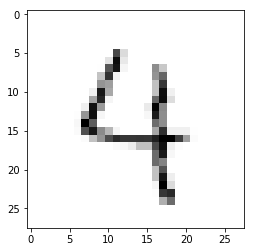

Prediction: 4


In [38]:
#######################################
## Checking the performance manually ##
#######################################

test_digit = 24

img = np.reshape(mnist.test.images[test_digit,:], [28,28])
plt.imshow(img, cmap='Greys')
plt.show()

#dig = np.argmax(mnist.test.labels[test_digit,:])
#print(dig)

prediction = sess.run(tf.argmax(y, 1), feed_dict={x: mnist.test.images})
print ("Prediction:", np.squeeze(prediction)[test_digit])

Text(0.5, 1.0, 'Loss for Minibatch (red) and Test-Data (blue)')

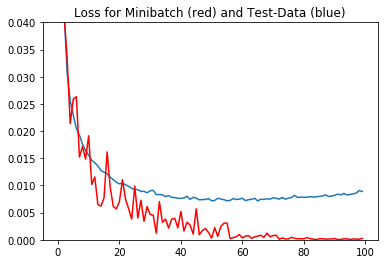

In [9]:
pr = np.arange(int(n_iterations/100))
plt.ylim(0,0.04)
plt.plot(pr,t_loss, pr, b_loss, 'r')
plt.title('Loss for Minibatch (red) and Test-Data (blue)')

Text(0.5, 1.0, 'Accuracy for Minibatch (red) and Test-Data (blue)')

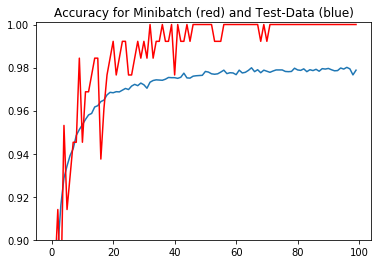

In [10]:
pr = np.arange(int(n_iterations/100))
plt.ylim(0.9,1.001)
plt.plot(pr,t_acc, pr, b_acc, 'r')
plt.title('Accuracy for Minibatch (red) and Test-Data (blue)' )
